# Association Analysis

## Apa itu Association Mining
- Association rule mining adalah teknik dalam data mining untuk menemukan hubungan yang menarik, pola yang sering terjadi, asosiasi, atau korelasi, antara variabel dalam set data yang besar.
- Banyak digunakan di berbagai bidang seperti market basket analysis, web usage mining, bioinformatika, dan masih banyak lagi. 
- Ide dasarnya adalah menemukan aturan yang memprediksi kemunculan suatu item berdasarkan kemunculan item lain dalam transaksi.

Salah satu pemanfaatan Association rule mining yaitu diterapkan pada *Market Basket Analysis*. 
 Banyak perusahaan bisnis mengumpulkan data dalam jumlah besar dari operasional mereka sehari-hari. Sejumlah besar data pembelian pelanggan dikumpulkan setiap hari.

Menganalisis data untuk mempelajari perilaku pembelian pelanggan mereka. Informasi berharga tersebut dapat digunakan untuk mendukung berbagai hal yang berhubungan dalam peningkatan sebuah bisnis.

**Manfaat :**
- Mengetahui produk apa yang sering dibeli bersamaan oleh pelanggan
- Memprediksi kemunculan suatu item berdasarkan kemunculan item lainnya item dalam transaksi
- Membantu dalam peletakkan barang dalam sebuah toko
- Menentukan produk apa saja yang harus ditawarkan ke pelanggan

## Association Rule Mining
Dalam serangkaian transaksi, menemukan aturan yang akan memprediksi kemunculan suatu item berdasarkan kemunculan item lainnya item dalam transaksi

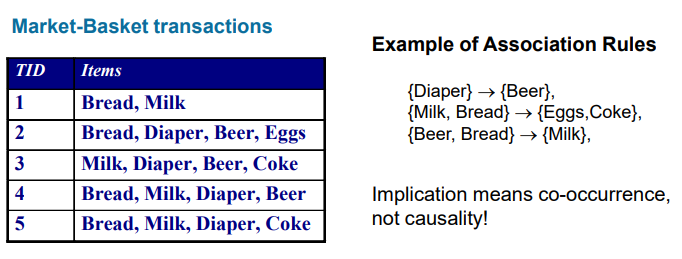

# Basic dalam Association Rule Mining

**Itemset** Sekumpulan satu atau lebih item.
- Contoh: {Susu, Roti, Popok}

**Frequent itemset** adalah itemset yang muncul dalam dataset dengan frekuensi yang lebih tinggi dari ambang batas yang ditentukan.


---


1. **Support** mengacu pada persentase keranjang(basket) di mana aturan tersebut benar (baik produk di sisi kiri maupun kanan ada).
   - **Frekuensi item dibeli dari semua transaksi**:
   $$
   \text{Support}(X \Rightarrow Y) = \frac{\text{frq}(X, Y)}{N}
   $$
   
2. **Confidence** mengukur persentase keranjang(basket) yang mengandung produk di sisi kiri juga mengandung produk di sisi kanan.
   - **Seberapa sering item X dan Y muncul bersama berdasarkan jumlah X terjadi (item kiri)**
   - **confidence membantu untuk melihat seberapa valid sebuah aturan**
   $$
   \text{Confidence}(X \Rightarrow Y) = \frac{\text{frq}(X, Y)}{\text{frq}(X)}
   $$
   
3. **Lift/Korelasi** mengukur seberapa lebih sering item di sisi kiri ditemukan dengan yang di kanan daripada tanpa yang di kanan.
   - **Confidence dari X dan Y dibandingkan dengan frekuensi Y terjadi (item kanan)**
   - **lift membantu untuk melihat seberapa besar ketergantungan antara item dalam aturan tersebut**
   $$
   \text{Lift}(X \Rightarrow Y) = \frac{\text{Support}(X, Y)}{\text{Support}(X) \times \text{Support}(Y)}
   $$

---


# Algorithm untuk Frequent Itemset Mining dan Rule Mining

## 1. Apriori
- Candidate Generation
- Brute Force - (mencoba semua kombinasi yang mungkin)
- Multiple scanning

## 2. FP Growth
- Without Candidate
- Depth First Search - divide and conquer
- Two scanning

# Contoh Implementasi Kasus dengan Apriori Algorithm


## The Bread Basket

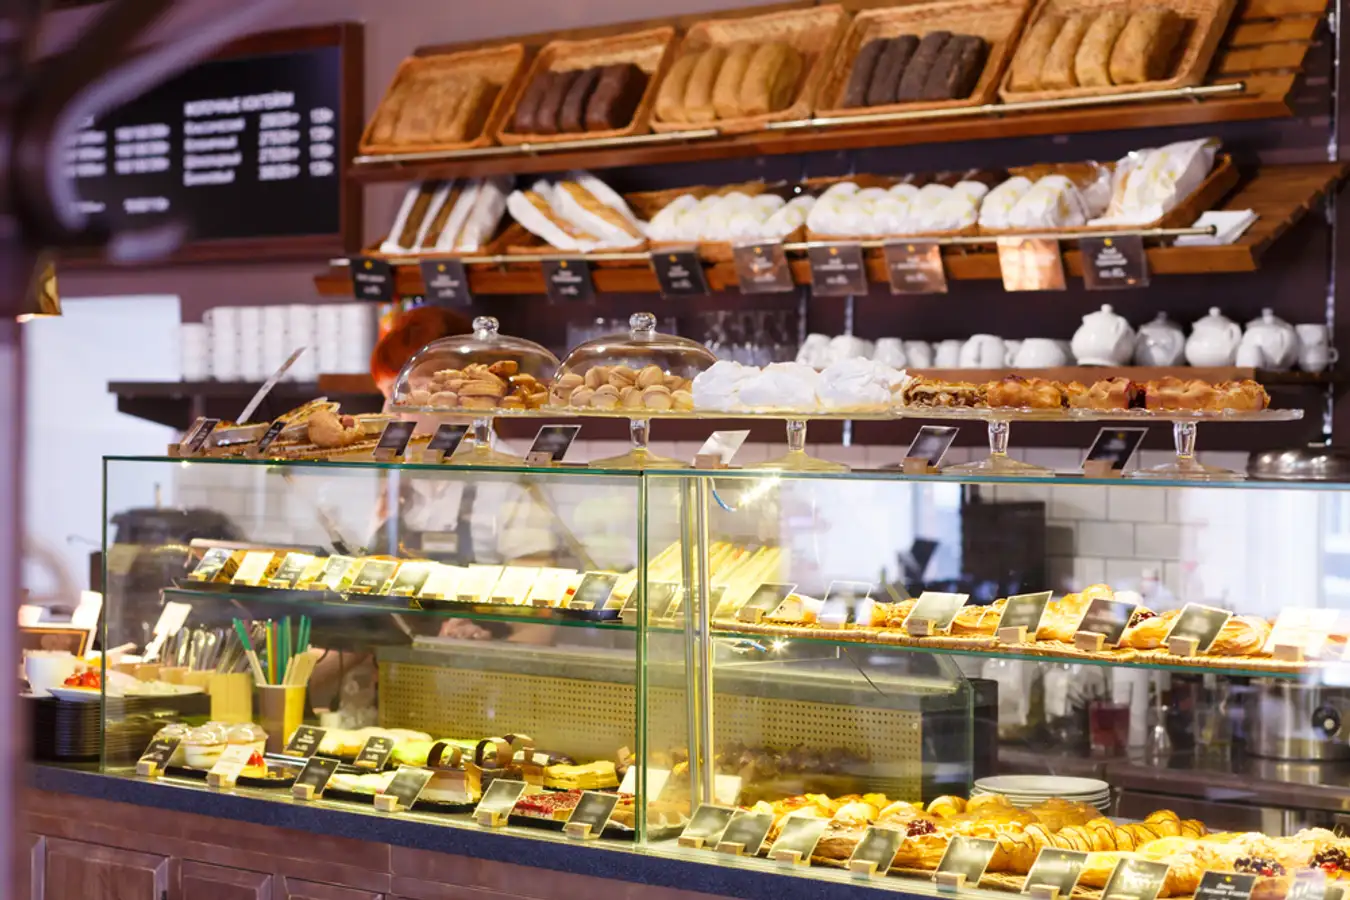

- Deskripsi Data:
  - Dataset ini milik "The Bread Basket", sebuah toko roti yang berlokasi di Edinburgh. Dataset memiliki 20.507 entri, lebih dari 9.000 transaksi, dan 4 kolom.
  - Dataset berisi transaksi pelanggan yang memesan berbagai item dari toko roti ini.
  - source: <a href = "https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket"> The bread basket </a>

- Tujuan Analisis:
  - Menemukan pola pembelian pelanggan dari data transaksi pada toko
  - Memberikan rekomendasi produk yang kemungkinan akan dibeli pelanggan
  - Memahami perilaku pembelian pelanggan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('Bakery.csv')
data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [3]:
data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [4]:
data.drop_duplicates(inplace = True)

Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18887 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  18887 non-null  int64 
 1   Items          18887 non-null  object
 2   DateTime       18887 non-null  object
 3   Daypart        18887 non-null  object
 4   DayType        18887 non-null  object
dtypes: int64(1), object(4)
memory usage: 885.3+ KB


In [6]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

C:\Users\farha\AppData\Local\Temp\ipykernel_11636\534989139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_freq.values, y=absolute_freq.index, palette='viridis')


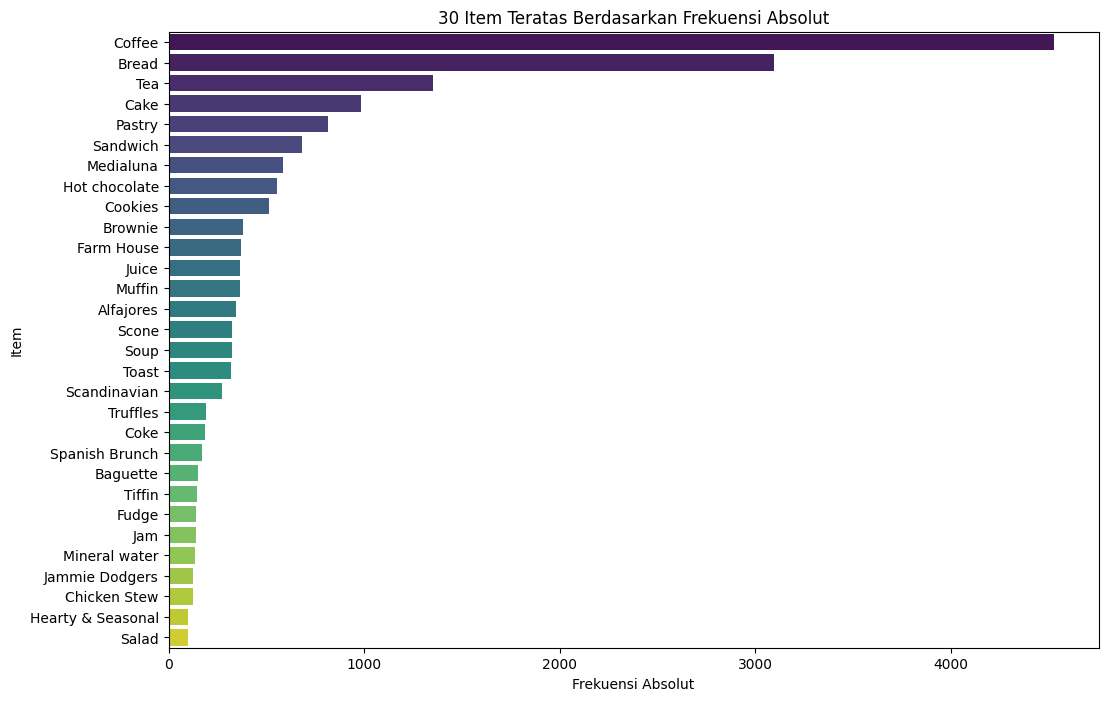

In [7]:
absolute_freq = data.value_counts('Items').nlargest(30)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=absolute_freq.values, y=absolute_freq.index, palette='viridis')
plt.xlabel('Frekuensi Absolut')
plt.ylabel('Item')
plt.title('30 Item Teratas Berdasarkan Frekuensi Absolut')
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_11636\4037908831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relative_freq.values, y=relative_freq.index, palette='plasma')


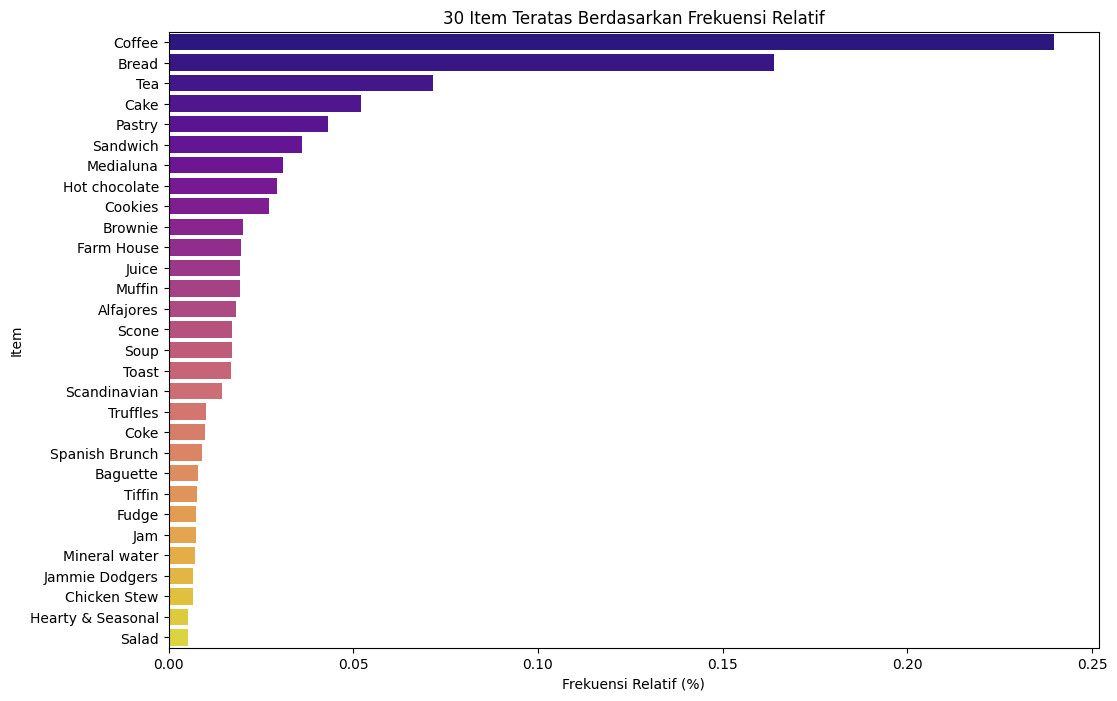

In [8]:
relative_freq = data.value_counts('Items', normalize=True).nlargest(30)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=relative_freq.values, y=relative_freq.index, palette='plasma')
plt.xlabel('Frekuensi Relatif (%)')
plt.ylabel('Item')
plt.title('30 Item Teratas Berdasarkan Frekuensi Relatif')
plt.show()

Processing data

In [9]:
dataset = data.groupby(["TransactionNo"])['Items'].value_counts()
dataset

TransactionNo  Items        
1              Bread            1
2              Scandinavian     1
3              Jam              1
               Hot chocolate    1
               Cookies          1
                               ..
9682           Muffin           1
               Coffee           1
9683           Pastry           1
               Coffee           1
9684           Smoothies        1
Name: count, Length: 18887, dtype: int64

In [10]:
dataset_df = dataset.unstack(fill_value=0)
dataset_df.reset_index(inplace=True)

In [11]:
dataset_df

Items,TransactionNo,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,9681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9462,9682,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9463,9683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dataset_df = dataset_df.drop(columns = ['TransactionNo']).copy()
dataset_df

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Encoding data antara 1 atau 0
def encode_units(x):
    return 1 if x >= 1 else 0

dataset_df = dataset_df.applymap(encode_units)

C:\Users\farha\AppData\Local\Temp\ipykernel_11636\4202604384.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_df = dataset_df.applymap(encode_units)


## Tahapan Apriori Algorithm

## Step 1 - Mining Frequent Itemsets
Penyelesaain dengan pendekatan brute force men-traverse semua kemungkinan itemsets, mencari **supportnya** dan mengeleminasi/prune infrequent itemset 

support tiap kandidat 1 item set

In [14]:
for n in dataset_df.columns:
    print(n, ":", len(dataset_df[dataset_df[n] == 1]) / len(dataset_df))

Adjustment : 0.00010565240359218173
Afternoon with the baker : 0.004543053354463814
Alfajores : 0.036344426835710514
Argentina Night : 0.0007395668251452721
Art Tray : 0.004014791336502906
Bacon : 0.00010565240359218173
Baguette : 0.016059165346011622
Bakewell : 0.005071315372424723
Bare Popcorn : 0.0005282620179609086
Basket : 0.0006339144215530904
Bowl Nic Pitt : 0.00021130480718436345
Bread : 0.32720549392498677
Bread Pudding : 0.0004226096143687269
Brioche and salami : 0.0003169572107765452
Brownie : 0.04004226096143687
Cake : 0.10385631273111463
Caramel bites : 0.0003169572107765452
Cherry me Dried fruit : 0.0003169572107765452
Chicken Stew : 0.012995245641838352
Chicken sand : 0.00010565240359218173
Chimichurri Oil : 0.00021130480718436345
Chocolates : 0.0009508716323296355
Christmas common : 0.001162176439513999
Coffee : 0.47839408346539886
Coffee granules  : 0.0007395668251452721
Coke : 0.019440042260961438
Cookies : 0.054410987849973586
Crepes : 0.0006339144215530904
Crisps : 

Jumlah tiap item support

In [15]:
for n in dataset_df.columns:
    print(n, ":", len(dataset_df[dataset_df[n] == 1]))

Adjustment : 1
Afternoon with the baker : 43
Alfajores : 344
Argentina Night : 7
Art Tray : 38
Bacon : 1
Baguette : 152
Bakewell : 48
Bare Popcorn : 5
Basket : 6
Bowl Nic Pitt : 2
Bread : 3097
Bread Pudding : 4
Brioche and salami : 3
Brownie : 379
Cake : 983
Caramel bites : 3
Cherry me Dried fruit : 3
Chicken Stew : 123
Chicken sand : 1
Chimichurri Oil : 2
Chocolates : 9
Christmas common : 11
Coffee : 4528
Coffee granules  : 7
Coke : 184
Cookies : 515
Crepes : 6
Crisps : 14
Drinking chocolate spoons  : 8
Duck egg : 12
Dulce de Leche : 13
Eggs : 28
Ella's Kitchen Pouches : 17
Empanadas : 7
Extra Salami or Feta : 38
Fairy Doors : 2
Farm House : 371
Focaccia : 54
Frittata : 81
Fudge : 142
Gift voucher : 1
Gingerbread syrup : 9
Granola : 28
Hack the stack : 2
Half slice Monster  : 6
Hearty & Seasonal : 100
Honey : 6
Hot chocolate : 552
Jam : 142
Jammie Dodgers : 125
Juice : 365
Keeping It Local : 63
Kids biscuit : 12
Lemon and coconut : 6
Medialuna : 585
Mighty Protein : 11
Mineral water :

kemudian  prune kandidat 1 itemset dengan minimum support 0.01

In [16]:
itemset_terpilih = []
kandidat1 = []
for n in dataset_df.columns:
    support  = len(dataset_df[dataset_df[n] == 1]) / len(dataset_df)
    
    if support >=  0.01:
        kandidat1.append(n)
        itemset_terpilih.append({"itemset" : n, 
                                 "Support":support})
        print(n,":",support)

Alfajores : 0.036344426835710514
Baguette : 0.016059165346011622
Bread : 0.32720549392498677
Brownie : 0.04004226096143687
Cake : 0.10385631273111463
Chicken Stew : 0.012995245641838352
Coffee : 0.47839408346539886
Coke : 0.019440042260961438
Cookies : 0.054410987849973586
Farm House : 0.03919704173269942
Fudge : 0.015002641310089805
Hearty & Seasonal : 0.010565240359218173
Hot chocolate : 0.05832012678288431
Jam : 0.015002641310089805
Jammie Dodgers : 0.013206550449022716
Juice : 0.03856312731114633
Medialuna : 0.061806656101426306
Mineral water : 0.014157422081352351
Muffin : 0.03845747490755415
Pastry : 0.0861067089276281
Salad : 0.010459587955625991
Sandwich : 0.07184363444268357
Scandinavian : 0.029054410987849975
Scone : 0.03454833597464342
Soup : 0.03444268357105124
Spanish Brunch : 0.018172213417855257
Tea : 0.14263074484944532
Tiffin : 0.015425250924458532
Toast : 0.03359746434231379
Truffles : 0.02028526148969889


Frequent item set  untuk kandidat dua itemset bedasarkan item set kandidat 1

In [17]:
# Semua kemungkinan kombinasi 2 itemset dari kandidat 1

from itertools import combinations
comb_2_items = list(combinations(kandidat1, 2))
len(comb_2_items)

435

In [18]:
comb_2_items

[('Alfajores', 'Baguette'),
 ('Alfajores', 'Bread'),
 ('Alfajores', 'Brownie'),
 ('Alfajores', 'Cake'),
 ('Alfajores', 'Chicken Stew'),
 ('Alfajores', 'Coffee'),
 ('Alfajores', 'Coke'),
 ('Alfajores', 'Cookies'),
 ('Alfajores', 'Farm House'),
 ('Alfajores', 'Fudge'),
 ('Alfajores', 'Hearty & Seasonal'),
 ('Alfajores', 'Hot chocolate'),
 ('Alfajores', 'Jam'),
 ('Alfajores', 'Jammie Dodgers'),
 ('Alfajores', 'Juice'),
 ('Alfajores', 'Medialuna'),
 ('Alfajores', 'Mineral water'),
 ('Alfajores', 'Muffin'),
 ('Alfajores', 'Pastry'),
 ('Alfajores', 'Salad'),
 ('Alfajores', 'Sandwich'),
 ('Alfajores', 'Scandinavian'),
 ('Alfajores', 'Scone'),
 ('Alfajores', 'Soup'),
 ('Alfajores', 'Spanish Brunch'),
 ('Alfajores', 'Tea'),
 ('Alfajores', 'Tiffin'),
 ('Alfajores', 'Toast'),
 ('Alfajores', 'Truffles'),
 ('Baguette', 'Bread'),
 ('Baguette', 'Brownie'),
 ('Baguette', 'Cake'),
 ('Baguette', 'Chicken Stew'),
 ('Baguette', 'Coffee'),
 ('Baguette', 'Coke'),
 ('Baguette', 'Cookies'),
 ('Baguette', 'Far

kemudian  prune kandidat 2 itemset dengan minimum support 0.01

In [19]:
kandidat2 = []
for comb in comb_2_items:
    support  = len(dataset_df[(dataset_df[comb[0]] == 1) & (dataset_df[comb[1]] == 1)]) / len(dataset_df)
    if support >=  0.01:
        print(comb, ":",support)
        itemset_terpilih.append({"itemset" : comb, 
                                 "Support":support})
        kandidat2.append(comb)

('Alfajores', 'Bread') : 0.01035393555203381
('Alfajores', 'Coffee') : 0.0196513470681458
('Bread', 'Brownie') : 0.010776545166402536
('Bread', 'Cake') : 0.02334918119387216
('Bread', 'Coffee') : 0.09001584786053883
('Bread', 'Cookies') : 0.014474379292128896
('Bread', 'Hot chocolate') : 0.01341785525620708
('Bread', 'Medialuna') : 0.016904384574749076
('Bread', 'Pastry') : 0.029160063391442156
('Bread', 'Sandwich') : 0.017010036978341258
('Bread', 'Tea') : 0.02810353935552034
('Brownie', 'Coffee') : 0.0196513470681458
('Cake', 'Coffee') : 0.054727945060750134
('Cake', 'Hot chocolate') : 0.011410459587955626
('Cake', 'Tea') : 0.02377179080824089
('Coffee', 'Cookies') : 0.02820919175911252
('Coffee', 'Hot chocolate') : 0.029582673005810883
('Coffee', 'Juice') : 0.020602218700475437
('Coffee', 'Medialuna') : 0.03518225039619651
('Coffee', 'Muffin') : 0.018806127839408347
('Coffee', 'Pastry') : 0.04754358161648178
('Coffee', 'Sandwich') : 0.038246170100369785
('Coffee', 'Scone') : 0.01806

Kemudian untuk langkah selanjutnya, buat kombinasi itemset dengan 3 item dari kandidat 2,
lalu hitung support untuk setiap kombinasi tersebut, dan hanya simpan itemset yang memenuhi minimum support.

Proses ini diulang untuk tiga item, empat item, dan seterusnya, hingga tidak ada lagi kombinasi yang memenuhi minimum support.

Tetapi pada contoh kasus diatas menggunakan 1 dan 2 item frequent set saja

## Step 2 Rules Generation
Setelah menemukan frequent itemsets dalam data transaksi, langkah berikutnya adalah membentuk aturan asosiasi. Aturan ini harus memenuhi syarat minimum support dan minimum confidence.



   $$
   \text{Confidence}(X \Rightarrow Y) = \frac{\text{frq}(X, Y)}{\text{frq}(X)}
   $$

seperti yang sudah disebutkan sebelumnya

[Basic dalam Association Rule Mining](#Basic-dalam-Association-Rule-Mining)


dataframe  frequent itemset terpilih

In [20]:
itemset_terpilih_df  = pd.DataFrame(itemset_terpilih)
itemset_terpilih_df

,itemset,Support
0,Alfajores,0.036344
1,Baguette,0.016059
2,Bread,0.327205
3,Brownie,0.040042
4,Cake,0.103856
5,Chicken Stew,0.012995
6,Coffee,0.478394
7,Coke,0.019440
8,Cookies,0.054411
9,Farm House,0.039197


Function untuk menentukan itemset yang memenuhi rule

In [21]:
def confidence_search(X, Y, treshlod):
    # x --> y
    # Menghitung support X dan Y
    freqXY = len(dataset_df[(dataset_df[X] == 1) & (dataset_df[Y] == 1)])

    # freq x
    frq_veg = len(dataset_df[dataset_df[X] == 1 ])

    # mengitung confidence rule
    confidence_rule = freqXY/frq_veg
    if confidence_rule >= treshlod:
        return {"x": X, 
                "y": Y,
                "X-->Y": f"{X} --> {Y}" ,
                "confidence_rule":confidence_rule}
    return {}

Mencari confidence dengan minimal 0.1

In [22]:
hasil_semua = []
for combItem in kandidat2:
    hasil_semua.append(confidence_search(combItem[0], combItem[1], treshlod=0.1))
    hasil_semua.append(confidence_search(combItem[1], combItem[0], treshlod=0.1))

In [23]:
hasil_aso = pd.DataFrame(hasil_semua).dropna()
hasil_aso

,x,y,X-->Y,confidence_rule
0,Alfajores,Bread,Alfajores --> Bread,0.284884
2,Alfajores,Coffee,Alfajores --> Coffee,0.540698
5,Brownie,Bread,Brownie --> Bread,0.269129
7,Cake,Bread,Cake --> Bread,0.224822
8,Bread,Coffee,Bread --> Coffee,0.275105
9,Coffee,Bread,Coffee --> Bread,0.188163
11,Cookies,Bread,Cookies --> Bread,0.266019
13,Hot chocolate,Bread,Hot chocolate --> Bread,0.230072
15,Medialuna,Bread,Medialuna --> Bread,0.273504
17,Pastry,Bread,Pastry --> Bread,0.338650


# Menggunakan mlxtend untuk membuat melakukan Association Analysis

Dengan menggunakan mlxtend memepermudah dalam melakukan Association Analysis <a href = "https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/">Apriori mlxtend</a>

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

Processing

In [25]:
basket = data.groupby(["TransactionNo"])['Items'].value_counts()
basket

TransactionNo  Items        
1              Bread            1
2              Scandinavian     1
3              Jam              1
               Hot chocolate    1
               Cookies          1
                               ..
9682           Muffin           1
               Coffee           1
9683           Pastry           1
               Coffee           1
9684           Smoothies        1
Name: count, Length: 18887, dtype: int64

In [26]:
basket = dataset.unstack(fill_value=0)
basket.reset_index(inplace=True)

In [27]:
basket

Items,TransactionNo,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,9681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9462,9682,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9463,9683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
basket = basket.drop(columns = ['TransactionNo'])
basket

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Encoding data antara 1 atau 0
def encode_units(x):
    return 1 if x >= 1 else 0

basket = basket.applymap(encode_units)

C:\Users\farha\AppData\Local\Temp\ipykernel_11636\258456053.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode_units)


## 1. Mining frequent Item set

semua kombonsai itemset dengan minimal support yaitu 0.01

In [30]:
freq_item = apriori(basket, min_support=0.01, use_colnames=True)
freq_item

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


dengan menggunakan **mlxtend** semua possible frequent set yang memenuhi support dari kombinasi 2 item set hingga yang paling banyak dapat diketahui

## 2. Rules Generation

Association rule dengan minimal support yaitu 0.1

In [31]:
association_rules(freq_item, metric='confidence', min_threshold= 0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.002326,0.920538,-0.183536
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947
4,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
5,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
6,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638,-0.195651
7,(Hot chocolate),(Bread),0.058320,0.327205,0.013418,0.230072,0.703144,-0.005665,0.873841,-0.309550
8,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.003319,0.926082,-0.173062
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980


# Kelebihan dan Kelemahan Apriori

- Kelebihan
  - Cukup mudah dan sederhana untuk diimplementasikan.
  - Aturan dalam algoritma mudah 
  - Bisa digunakan untuk menghitung kumpulan item yang jumlahnya besar/banyak
- Kekurangan 
  - Perlu menghabiskan banyak waktu untuk data yang sangat besar
  - Membutuhkan banyak memori

# Kesimpulan

Ringkasan:

1. Association Rule Mining: 
   - Proses menemukan pola, asosiasi, dan korelasi antar item dalam database.
2. Konsep Dasar: 
   - Aturan Asosiasi dan framework Support-Confidence.
3. Pengukuran: 
   - Support (seberapa sering aturan berlaku), Confidence (kemungkinan aturan benar), dan Lift (korelasi).
4. Algoritma APRIORI:
   - Pembuatan Kandidat dan Penambangan Itemset Sering untuk menghasilkan aturan.
5. Aplikasi: 
   - Berguna untuk menemukan pola, misalnya dalam Market Basket Analysis.

# Sumber
[1] https://medium.com/image-processing-with-python/fundaments-of-associate-rule-mining-468801ec0a29


[2] <a href ="https://www.youtube.com/watch?v=tS8x46ngu_k&t=2s">Association Rule Mining </a>

[3] https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis

[4] https://revou.co/kosakata/algoritma-apriori

[5] <a href = https://www-users.cse.umn.edu/~kumar001/dmbook/index.php>Intoduction to data mining</a>